In [146]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
x = diab.data
y = diab.target

In [149]:
df = pd.DataFrame(x, columns=data.feature_names)
df["target"] = y  
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

/tmp/ipykernel_4352/548922864.py:12: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4352/548922864.py:12: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


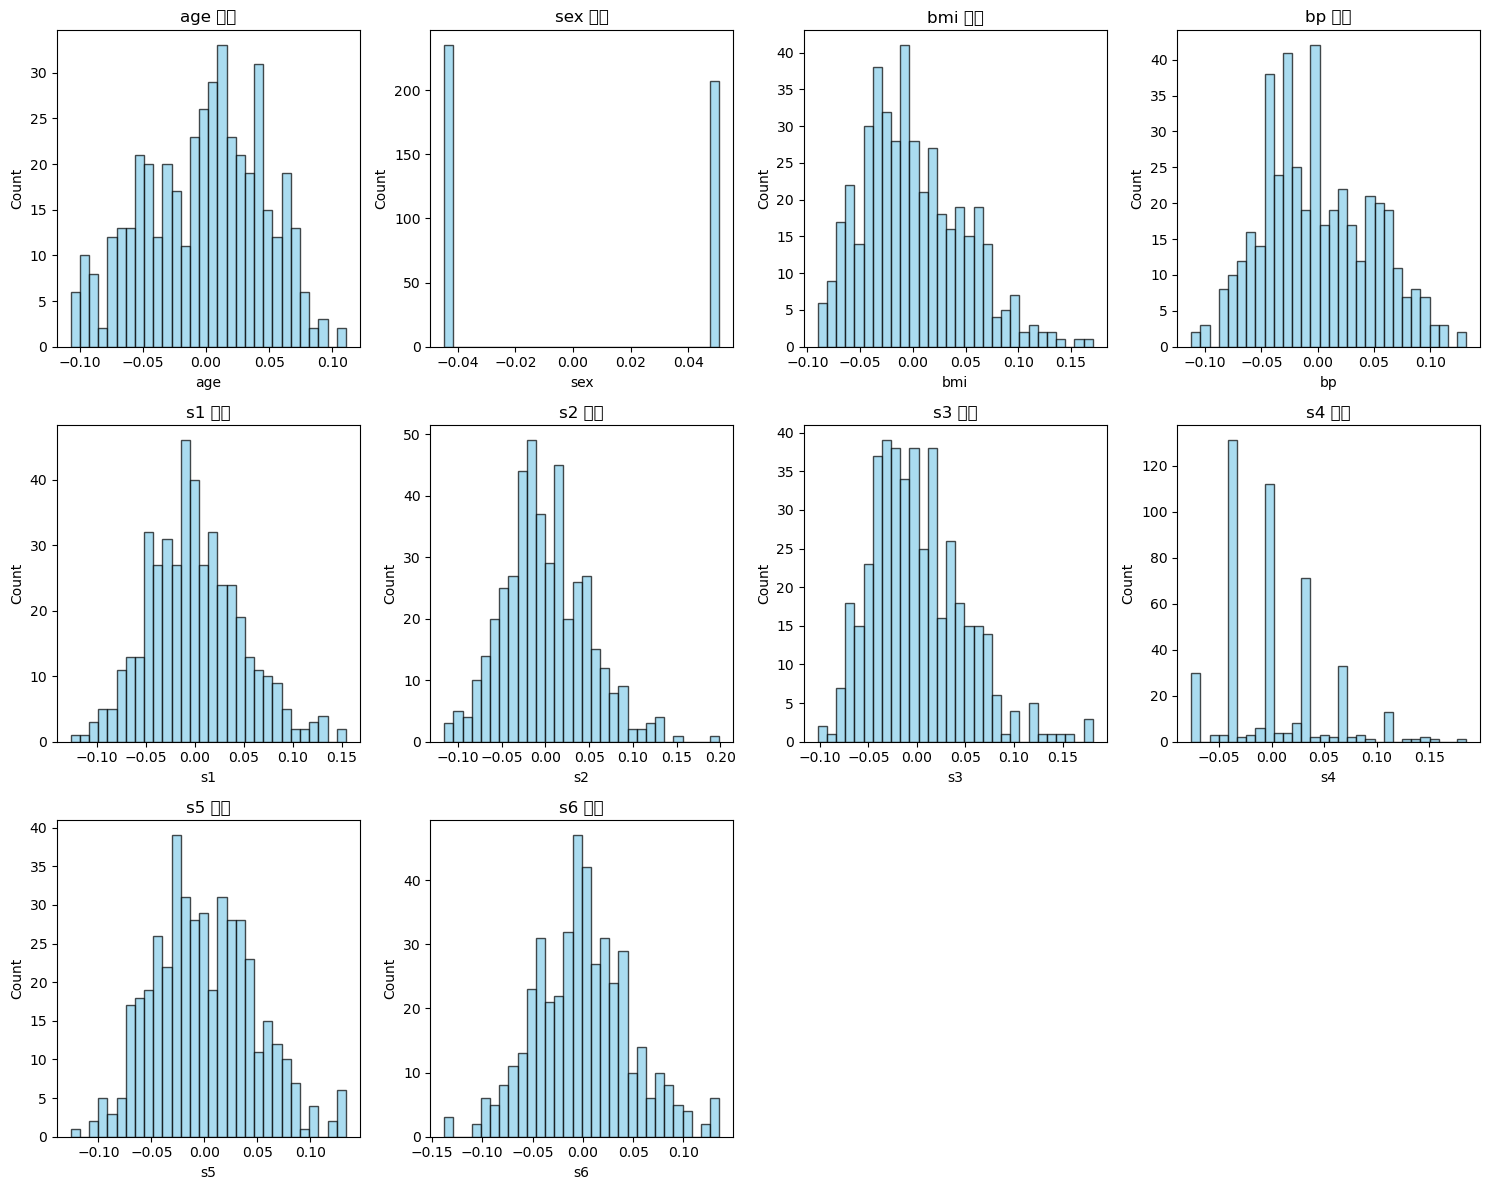

In [150]:
features = df.columns[:-1]   # target 제외

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    plt.hist(df[feature], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
    plt.title(f"{feature} 분포")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


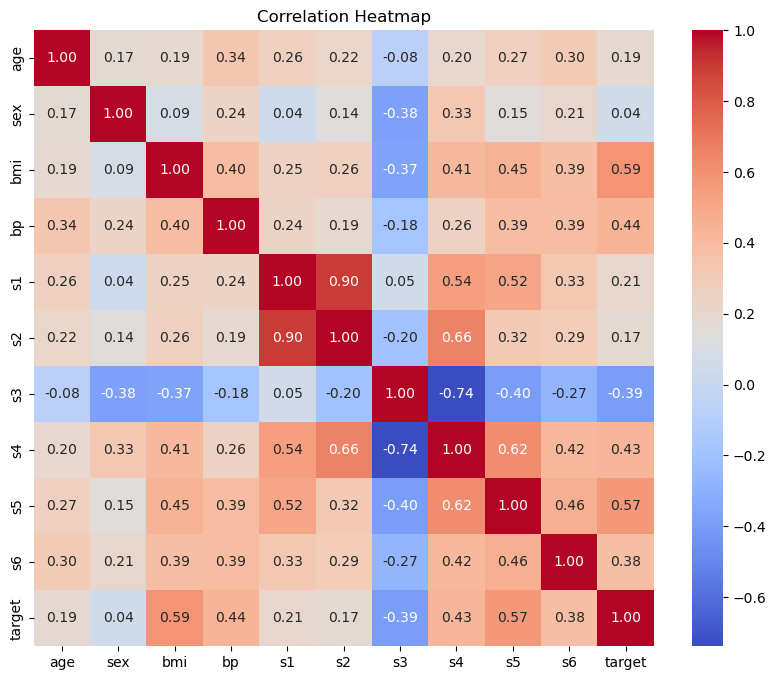

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [196]:
selected_features = corr[abs(corr) >= 0.1].index # 0.5 이상 상관계수로 해서 변수를 덜어내고 했더니 계속 에러가 나서 변수 드랍 없이 진행. 나중에 질의를 드리고자 합니다. 한참 찾아도 이유를 알지 못하겠네요.
print(selected_features)

Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [200]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [201]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [202]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [203]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [204]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [205]:
LEARNING_RATE = 0.01

In [208]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3017.0729
Iteration 200 : Loss 3016.5510
Iteration 300 : Loss 3016.0316
Iteration 400 : Loss 3015.5147
Iteration 500 : Loss 3015.0002
Iteration 600 : Loss 3014.4882
Iteration 700 : Loss 3013.9787
Iteration 800 : Loss 3013.4716
Iteration 900 : Loss 3012.9668
Iteration 1000 : Loss 3012.4645
Iteration 1100 : Loss 3011.9646
Iteration 1200 : Loss 3011.4671
Iteration 1300 : Loss 3010.9719
Iteration 1400 : Loss 3010.4791
Iteration 1500 : Loss 3009.9886
Iteration 1600 : Loss 3009.5005
Iteration 1700 : Loss 3009.0146
Iteration 1800 : Loss 3008.5311
Iteration 1900 : Loss 3008.0499
Iteration 2000 : Loss 3007.5709
Iteration 2100 : Loss 3007.0942
Iteration 2200 : Loss 3006.6198
Iteration 2300 : Loss 3006.1476
Iteration 2400 : Loss 3005.6776
Iteration 2500 : Loss 3005.2099
Iteration 2600 : Loss 3004.7444
Iteration 2700 : Loss 3004.2811
Iteration 2800 : Loss 3003.8199
Iteration 2900 : Loss 3003.3610
Iteration 3000 : Loss 3002.9042
Iteration 3100 : Loss 3002.4496
Iteration 3200 : 

In [102]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(5003.814932588924)

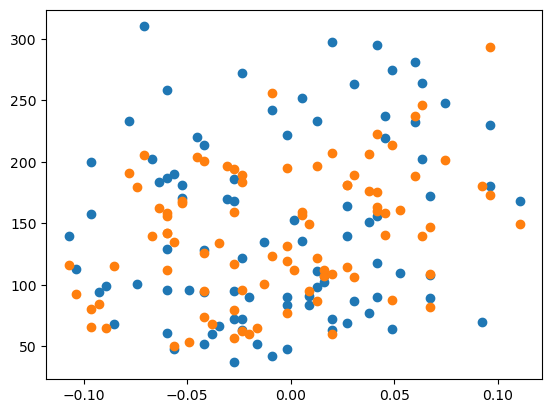

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()